In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip /content/drive/MyDrive/RL_fdr.zip -d /content/RL_fdr
!unzip /content/drive/MyDrive/RL_pose.zip -d /content/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/RL_pose/violence/99/V_99.mp4_frame1_rendered.png  
  inflating: /content/RL_pose/violence/389/V_389.mp4_frame2_rendered.png  
  inflating: /content/RL_pose/violence/770/V_770.mp4_frame2_rendered.png  
  inflating: /content/RL_pose/violence/389/V_389.mp4_frame5_rendered.png  
  inflating: /content/RL_pose/violence/856/V_856.mp4_frame1_rendered.png  
  inflating: /content/RL_pose/violence/722/V_722.mp4_frame0_rendered.png  
  inflating: /content/RL_pose/violence/882/V_882.mp4_frame4_rendered.png  
  inflating: /content/RL_pose/violence/882/V_882.mp4_frame3_rendered.png  
  inflating: /content/RL_pose/non_violence/574/NV_574.mp4_frame1_rendered.png  
  inflating: /content/RL_pose/non_violence/574/NV_574.mp4_frame2_rendered.png  
  inflating: /content/RL_pose/violence/856/V_856.mp4_frame2_rendered.png  
  inflating: /content/RL_pose/violence/722/V_722.mp4_frame4_rendered.png  
  inflating: /content/RL_pose/violence/882/V_882.mp4_fra

In [5]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# 원본 이미지 데이터셋 경로 설정
v_original_folder = '/content/RL_fdr/violence'
nv_original_folder = '/content/RL_fdr/non_violence'

# POSE 데이터셋 경로 설정
v_pose_folder = '/content/RL_pose/violence'
nv_pose_folder = '/content/RL_pose/non_violence'

# 데이터셋 초기화
v_origin_images = []
nv_origin_images = []
v_pose_images = []
nv_pose_images = []

# 원본 이미지 데이터셋 - 폭행 데이터
for folder_number in range(1, 1001):
    v_original_path = os.path.join(v_original_folder, str(folder_number))

    # 폴더가 존재하지 않으면 넘어가기
    if not os.path.exists(v_original_path):
        continue

    for v_img_file in os.listdir(v_original_path):
        # JPG 파일만 읽어오기
        if v_img_file.lower().endswith(".jpg"):
            v_origin_img_path = os.path.join(v_original_path, v_img_file)

            try:
                v_origin_img_array = cv2.imread(v_origin_img_path)
                if v_origin_img_array is None or v_origin_img_array.size == 0:
                    print(f"이미지를 읽을 수 없거나 비어 있습니다: {v_origin_img_path}")
                    continue

                v_origin_img_array_resized = cv2.resize(v_origin_img_array, (64, 64))  # 이미지 크기 리사이징
                v_origin_images.append(v_origin_img_array_resized)
            except Exception as e:
                print(f"이미지 처리 중 오류 발생: {v_origin_img_path}")
                print(f"에러 메시지: {str(e)}")

# 원본 이미지 데이터셋 - 비폭행 데이터
for folder_number in range(1, 1001):
    nv_original_path = os.path.join(nv_original_folder, str(folder_number))
    for nv_img_file in os.listdir(nv_original_path):
        # JPG 파일만 읽어오기
        if nv_img_file.lower().endswith(".jpg"):
            nv_origin_img_path = os.path.join(nv_original_path, nv_img_file)

            try:
                nv_origin_img_array = cv2.imread(nv_origin_img_path)
                if nv_origin_img_array is None or nv_origin_img_array.size == 0:
                    print(f"이미지를 읽을 수 없거나 비어 있습니다: {nv_origin_img_path}")
                    continue

                nv_origin_img_array_resized = cv2.resize(nv_origin_img_array, (64, 64))  # 이미지 크기 리사이징
                nv_origin_images.append(nv_origin_img_array_resized)
            except Exception as e:
                print(f"이미지 처리 중 오류 발생: {nv_origin_img_path}")
                print(f"에러 메시지: {str(e)}")

# POSE 데이터셋 - 폭행 데이터
for folder_number in range(1, 1001):
    v_pose_path = os.path.join(v_pose_folder, str(folder_number))

    # 폴더가 존재하지 않으면 넘어가기
    if not os.path.exists(v_pose_path):
        continue

    for v_img_file in os.listdir(v_pose_path):
        # JPG 파일만 읽어오기
        if v_img_file.lower().endswith(".png"):
            v_pose_img_path = os.path.join(v_pose_path, v_img_file)

            try:
                v_pose_img_array = cv2.imread(v_pose_img_path)
                if v_pose_img_array is None or v_pose_img_array.size == 0:
                    print(f"이미지를 읽을 수 없거나 비어 있습니다: {v_pose_img_path}")
                    continue

                v_pose_img_array_resized = cv2.resize(v_pose_img_array, (64, 64))  # 이미지 크기 리사이징
                v_pose_images.append(v_pose_img_array_resized)
            except Exception as e:
                print(f"이미지 처리 중 오류 발생: {v_pose_img_path}")
                print(f"에러 메시지: {str(e)}")

# POSE 데이터셋 - 비폭행 데이터
for folder_number in range(1, 1001):
    nv_pose_path = os.path.join(nv_pose_folder, str(folder_number))
    for nv_img_file in os.listdir(nv_pose_path):
        # JPG 파일만 읽어오기
        if nv_img_file.lower().endswith(".png"):
            nv_pose_img_path = os.path.join(nv_pose_path, nv_img_file)

            try:
                nv_pose_img_array = cv2.imread(nv_pose_img_path)
                if nv_pose_img_array is None or nv_pose_img_array.size == 0:
                    print(f"이미지를 읽을 수 없거나 비어 있습니다: {nv_pose_img_path}")
                    continue

                nv_pose_img_array_resized = cv2.resize(nv_pose_img_array, (64, 64))  # 이미지 크기 리사이징
                nv_pose_images.append(nv_pose_img_array_resized)
            except Exception as e:
                print(f"이미지 처리 중 오류 발생: {nv_pose_img_path}")
                print(f"에러 메시지: {str(e)}")

In [6]:
#이거 20분 넘게 걸림

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import TimeDistributed, LSTM, Dense, Flatten, Input
from tensorflow.keras.models import Model
import numpy as np
import cv2

# 이미지 특징 추출을 위한 VGG16 모델 불러오기
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 입력 레이어 생성
input_layer = Input(shape=(None, 32, 32, 3))

# VGG16 모델에 LSTM 레이어 추가
x = TimeDistributed(base_model)(input_layer)
x = TimeDistributed(Flatten())(x)
x = LSTM(256, activation='tanh', return_sequences=False)(x)  # 변경된 부분

# 모델 생성
model = Model(inputs=input_layer, outputs=x)

# 특징 추출 함수 정의
def extract_features(images, sequence_length):
    features = []
    sequence_length = min(len(images), sequence_length)  # 이미지 리스트의 길이와 sequence_length 중 작은 값을 사용
    for i in range(sequence_length):
        # 이미지 리사이징
        resized_img = cv2.resize(images[i], (32, 32))

        # 이미지 정규화
        normalized_img = resized_img / 255.0

        # 이미지를 1차원 벡터로 변환
        img_vector = normalized_img.flatten()

        features.append(img_vector)

    # 3차원 배열로 변환 (시퀀스 길이, 64, 64, 3)
    return np.array(features).reshape(-1, 32, 32, 3)


sequence_length = 2

# 원본 이미지와 포즈 이미지의 특징 추출 및 결합
combined_features_v = []
combined_features_nv = []

for i, (v_origin_img, v_pose_img) in enumerate(zip(v_origin_images, v_pose_images)):
    print(f"Processing v_origin_images and v_pose_images: {i+1}/{len(v_origin_images)}")

    # 원본 이미지의 특징 추출
    features_v_origin = model.predict(np.expand_dims(extract_features([v_origin_img], sequence_length), axis=0), verbose=0)

    # 포즈 이미지의 특징 추출
    features_v_pose = model.predict(np.expand_dims(extract_features([v_pose_img], sequence_length), axis=0), verbose=0)

    # 원본 이미지와 포즈 이미지의 특징을 결합
    combined_features_v.append(np.concatenate((features_v_origin, features_v_pose), axis=-1))

for i, (nv_origin_img, nv_pose_img) in enumerate(zip(nv_origin_images, nv_pose_images)):
    print(f"Processing nv_origin_images and nv_pose_images: {i+1}/{len(nv_origin_images)}")

    # 원본 이미지의 특징 추출
    features_nv_origin = model.predict(np.expand_dims(extract_features([nv_origin_img], sequence_length), axis=0), verbose=0)

    # 포즈 이미지의 특징 추출
    features_nv_pose = model.predict(np.expand_dims(extract_features([nv_pose_img], sequence_length), axis=0), verbose=0)

    # 원본 이미지와 포즈 이미지의 특징을 결합
    combined_features_nv.append(np.concatenate((features_nv_origin, features_nv_pose), axis=-1))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Processing nv_origin_images and nv_pose_images: 232/5231
Processing nv_origin_images and nv_pose_images: 233/5231
Processing nv_origin_images and nv_pose_images: 234/5231
Processing nv_origin_images and nv_pose_images: 235/5231
Processing nv_origin_images and nv_pose_images: 236/5231
Processing nv_origin_images and nv_pose_images: 237/5231
Processing nv_origin_images and nv_pose_images: 238/5231
Processing nv_origin_images and nv_pose_images: 239/5231
Processing nv_origin_images and nv_pose_images: 240/5231
Processing nv_origin_images and nv_pose_images: 241/5231
Processing nv_origin_images and nv_pose_images: 242/5231
Processing nv_origin_images and nv_pose_images: 243/5231
Processing nv_origin_images and nv_pose_images: 244/5231
Processing nv_origin_images and nv_pose_images: 245/5231
Processing nv_origin_images and nv_pose_images: 246/5231
Processing nv_origin_images and nv_pose_images: 247/5231
Processing nv_origin_images and nv_pose_images: 248/

In [7]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import TimeDistributed, LSTM, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# 클래스 레이블을 정의
labels_v = np.ones(len(combined_features_v))  # 예시: 클래스 1은 폭력 이미지
labels_nv = np.zeros(len(combined_features_nv))  # 예시: 클래스 0은 비폭력 이미지

# 이미지와 레이블을 훈련 및 테스트 데이터셋으로 나눔
train_data, test_data, train_labels, test_labels = train_test_split(
    np.concatenate((combined_features_v, combined_features_nv)),
    np.concatenate((labels_v, labels_nv)),
    test_size=0.2,
    random_state=42,
    stratify=np.concatenate((labels_v, labels_nv))  # 클래스 레이블에 따라 계층화
)

# 클래스 불균형 보정을 위해 데이터를 섞고 다시 분할
combined_images = np.concatenate((combined_features_v, combined_features_nv))
combined_labels = np.concatenate((labels_v, labels_nv))
combined_images, combined_labels = shuffle(combined_images, combined_labels, random_state=42)

train_data, test_data, train_labels, test_labels = train_test_split(
    combined_images, combined_labels, test_size=0.2, random_state=42, stratify=combined_labels
)

# 모델 정의 및 컴파일
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

input_layer = Input(shape=(None, 64, 64, 3))
x = TimeDistributed(base_model)(input_layer)
x = TimeDistributed(Flatten())(x)
x = LSTM(256, activation='relu', return_sequences=False)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 훈련 데이터셋 확인
print("Train data shape:", train_data.shape)
print("Train labels:", train_labels)

# 테스트 데이터셋 확인
print("Test data shape:", test_data.shape)
print("Test labels:", test_labels)

Train data shape: (8850, 1, 512)
Train labels: [1. 1. 1. ... 0. 1. 1.]
Test data shape: (2213, 1, 512)
Test labels: [0. 1. 1. ... 1. 0. 1.]


Epoch 1/30
249/249 [==============================] - 8s 5ms/step - loss: 0.6814 - accuracy: 0.5571 - val_loss: 0.6511 - val_accuracy: 0.6576
Epoch 2/30
249/249 [==============================] - 1s 4ms/step - loss: 0.6289 - accuracy: 0.6522 - val_loss: 0.5713 - val_accuracy: 0.7017
Epoch 3/30
249/249 [==============================] - 1s 6ms/step - loss: 0.5760 - accuracy: 0.6998 - val_loss: 0.5320 - val_accuracy: 0.7345
Epoch 4/30
249/249 [==============================] - 2s 6ms/step - loss: 0.5404 - accuracy: 0.7217 - val_loss: 0.5006 - val_accuracy: 0.7559
Epoch 5/30
249/249 [==============================] - 2s 8ms/step - loss: 0.5166 - accuracy: 0.7431 - val_loss: 0.4749 - val_accuracy: 0.7774
Epoch 6/30
249/249 [==============================] - 2s 8ms/step - loss: 0.4990 - accuracy: 0.7548 - val_loss: 0.4569 - val_accuracy: 0.7898
Epoch 7/30
249/249 [==============================] - 2s 7ms/step - loss: 0.4760 - accuracy: 0.7704 - val_loss: 0.4910 - val_accuracy: 0.7593
Epoch 

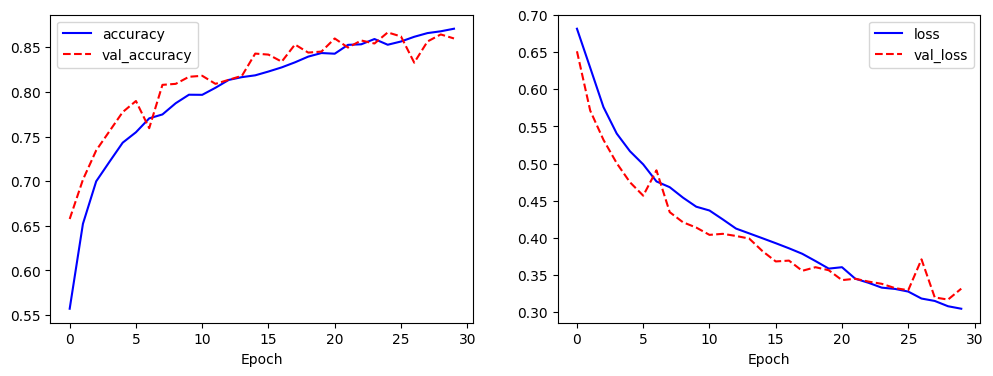

70/70 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8495
테스트 손실: 0.3430902659893036, 테스트 정확도: 0.849525511264801


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

train_data = np.squeeze(train_data, axis=1)
test_data = np.squeeze(test_data, axis=1)

# 모델 구축
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(512,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# 모델 컴파일
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 훈련
history = model.fit(train_data, train_labels, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# 훈련의 정확도와 손실 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# 모델 평가
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'테스트 손실: {loss}, 테스트 정확도: {accuracy}')

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 모델 예측
preds = model.predict(test_data)
preds = np.round(preds)  # 이진 분류 문제의 경우 반올림으로 예측 클래스를 결정

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(test_labels, preds)
recall = recall_score(test_labels, preds)
f1 = f1_score(test_labels, preds)

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

70/70 [==============================] - 0s 2ms/step
Precision: 0.9072265625, Recall: 0.7960582690659811, F1 Score: 0.8480146052031037


70/70 [==============================] - 0s 2ms/step


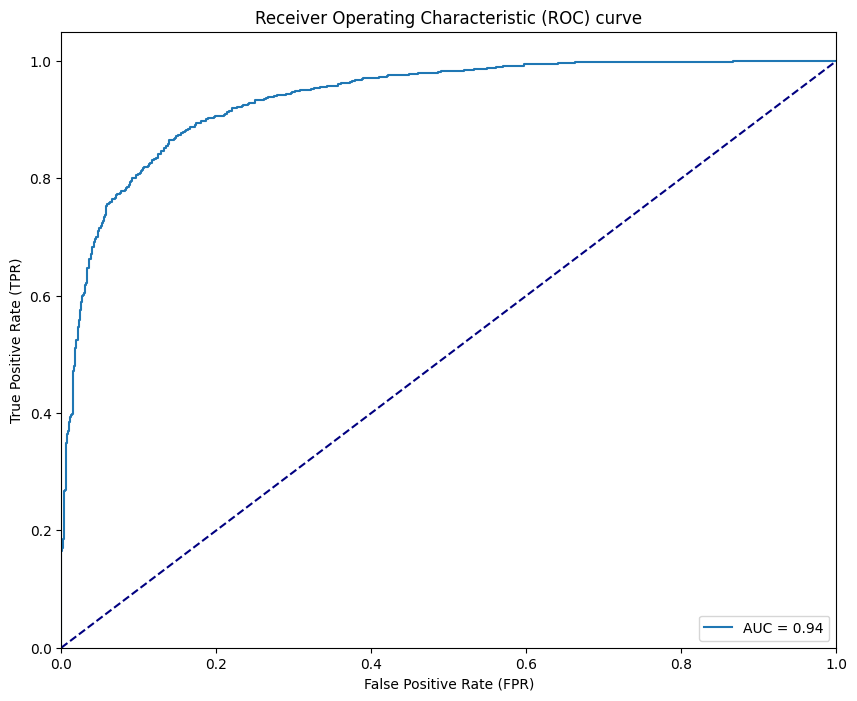

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 모델에 대한 예측 수행
preds = model.predict(test_data).ravel()  # ravel()로 1차원 배열로 변경

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(test_labels, preds)

# AUC 계산
auc = roc_auc_score(test_labels, preds)

# ROC 커브 그리기
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # 대각선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
# VGG16 모델 불러오기
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# 모델의 구조 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 427009 (1.63 MB)
Trainable params: 42700